In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

# Epsilon Greedy

In [ ]:
class eps_bandit:
  '''
  epsilon greedy k-bandit problem
  Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
  def __init__(self,k,eps,iters,mu='random'):
    # Number of arms
    self.k = k
    # Search probability
    self.eps = eps
    # Number of iterations
    self.iters = iters
    # Step count
    self.n = 0
    # Step count for each arm
    self.k_n = np.zeros(k)
    # Total mean reward
    self.mean_reward = 0
    self.reward = np.zeros(iters)
    # Mean reward for each arm
    self.k_reward = np.zeros(k)
    if type(mu) == list or type(mu).__module__ == np.__name__:
        # User-defined averages            
        self.mu = np.array(mu)
    elif mu == 'random':
        # Draw means from probability distribution
        self.mu = np.random.rand(k)
    elif mu == 'sequence':
        # Increase the mean for each arm by one
        self.mu = np.linspace(0, k-1, k)

  def pull(self):
    # Generate random number
    p = np.random.rand()
    if self.eps == 0 and self.n == 0:
        a = np.random.choice(self.k)
    elif p < self.eps:
        # Randomly select an action
        a = np.random.choice(self.k)
    else:
        # Take greedy action
        a = np.argmax(self.k_reward)

    # reward = np.random.normal(self.mu[a], 1)
    # print(self.mu)
    reward = np.random.binomial(1,self.mu[a],1)
    
    # Update counts
    self.n += 1
    self.k_n[a] += 1
    
    # Update total
    self.mean_reward = self.mean_reward + (
        reward - self.mean_reward) / self.n
    
    # Update results for a_k
    self.k_reward[a] = self.k_reward[a] + (
        reward - self.k_reward[a]) / self.k_n[a]

  def run(self):
    for i in range(self.iters):
      self.pull()
      self.reward[i] = self.mean_reward

  def reset(self):
    # Resets results while keeping settings
    self.n = 0
    self.k_n = np.zeros(k)
    self.mean_reward = 0
    self.reward = np.zeros(iters)
    self.k_reward = np.zeros(k)

In [ ]:
'''
K-arms simulation
'''
k = 10
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_3_rewards = np.zeros(iters)
eps_5_rewards = np.zeros(iters)

eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)
eps_3_selection = np.zeros(k)
eps_5_selection = np.zeros(k)

episodes = 100
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    # eps_3 = eps_bandit(k, 0.3, iters, eps_0.mu.copy())
    eps_5 = eps_bandit(k, 0.5, iters, eps_0.mu.copy())
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    # eps_3.run()
    eps_5.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    # eps_3_rewards = eps_3_rewards + (
    #     eps_3.reward - eps_3_rewards) / (i + 1)
    eps_5_rewards = eps_5_rewards + (
        eps_5.reward - eps_5_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (
        eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    # eps_3_selection = eps_3_selection + (
    #     eps_3.k_n - eps_3_selection) / (i + 1)
    eps_5_selection = eps_5_selection + (
        eps_5.k_n - eps_5_selection) / (i + 1)
  
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
# plt.plot(eps_3_rewards, label="$\epsilon=0.3$")
plt.plot(eps_5_rewards, label="$\epsilon=0.5$")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards")
plt.show()

In [ ]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
# plt.bar(bins, eps_0_selection, 
#         width = 0.33, color='b', 
#         label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection,
        width=0.33, color='g', 
        label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, 
        width=0.33, color='r',
        label="$\epsilon=0.1$")

plt.bar(bins+0.99, eps_3_selection, 
        width=0.33, color='b',
        label="$\epsilon=0.3$")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_01_selection, eps_1_selection,
                   eps_3_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0.01$', 
    '$\epsilon=0.1$', '$\epsilon=0.3$'],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

# Epsilon greedy decay

In [ ]:
class eps_decay_bandit:
    '''
    epsilon-decay k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k,  iters, c=0.07,mu='random'):
        # Number of arms
        self.k = k
        # Hyper param
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.rand(k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Generate random number
        p = np.random.rand()
        # if p < self.c*np.exp(-self.iters):
        if p < 1 / (1 + self.c*self.iters / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.binomial(1,self.mu[a],1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

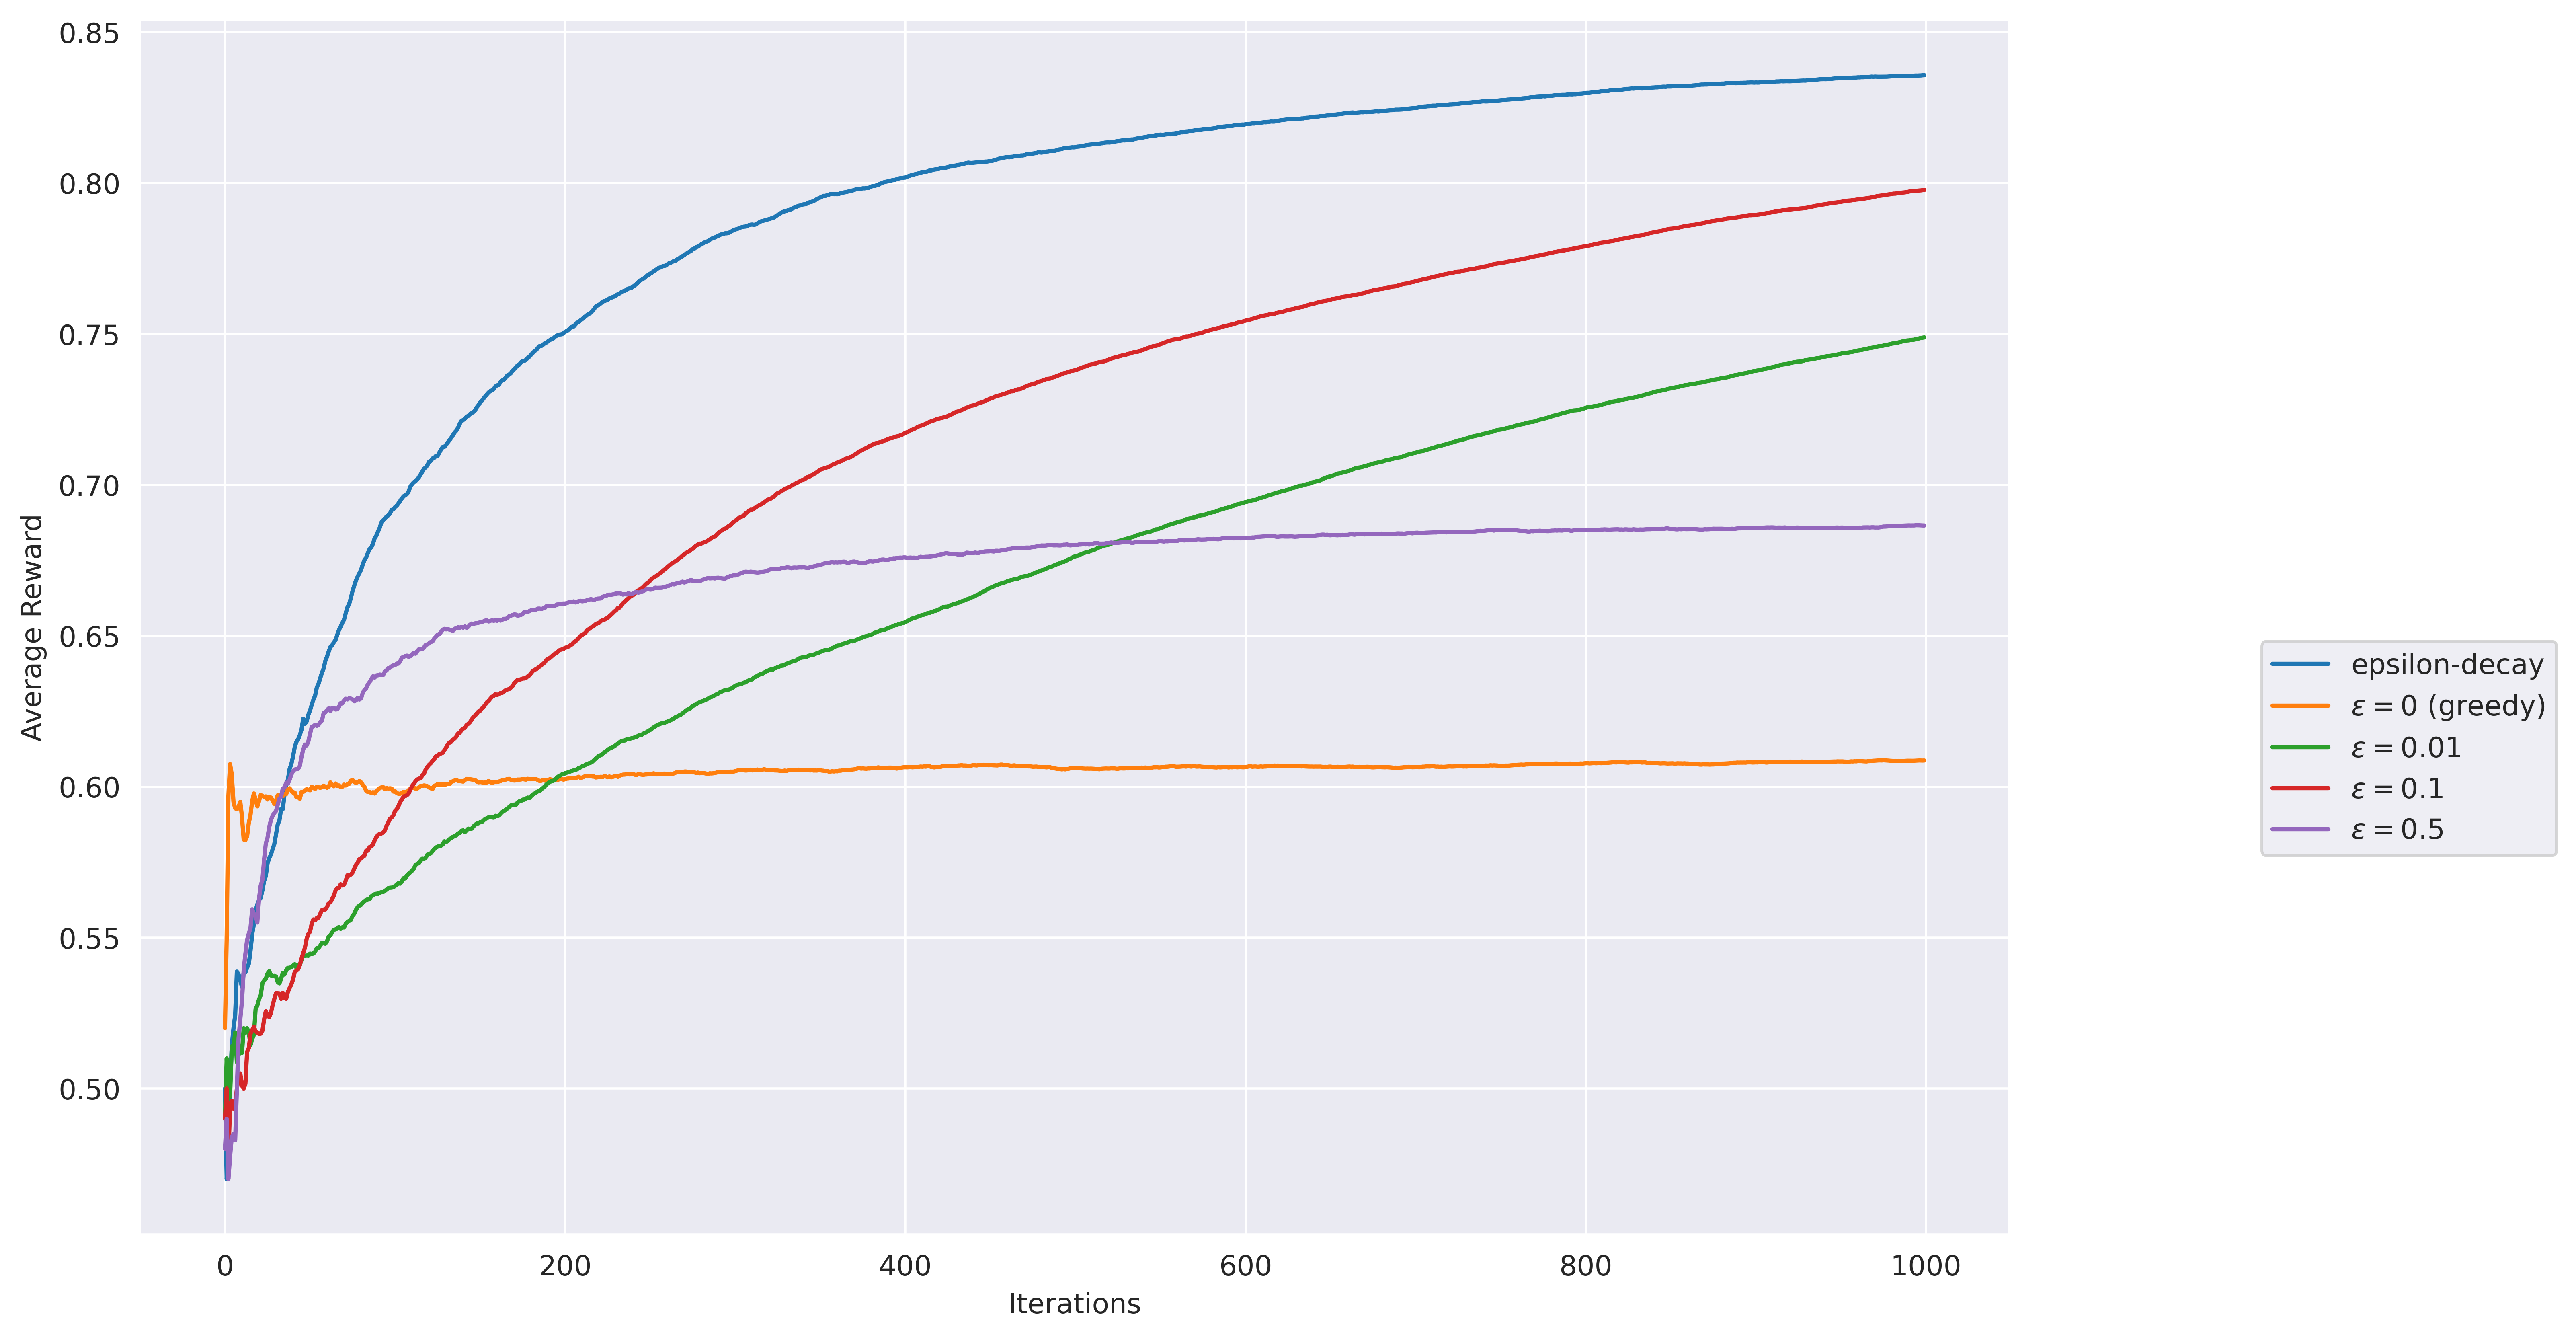

In [ ]:
'''
K-arms simulation
'''
k = 10
iters = 1000

eps_decay_rewards = np.zeros(iters)
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_3_rewards = np.zeros(iters)
eps_5_rewards = np.zeros(iters)

eps_decay_selection = np.zeros(k)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)
eps_3_selection = np.zeros(k)
eps_5_selection = np.zeros(k)

episodes = 100
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k,iters, 0.1)
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.02, iters, eps_0.mu.copy())
    # eps_3 = eps_bandit(k, 0.3, iters, eps_0.mu.copy())
    eps_5 = eps_bandit(k, 0.5, iters, eps_0.mu.copy())
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    # eps_3.run()
    eps_5.run()
    eps_decay.run()
    
    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    # eps_3_rewards = eps_3_rewards + (
    #     eps_3.reward - eps_3_rewards) / (i + 1)
    eps_5_rewards = eps_5_rewards + (
        eps_5.reward - eps_5_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (
        eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    # eps_3_selection = eps_3_selection + (
    #     eps_3.k_n - eps_3_selection) / (i + 1)
    eps_5_selection = eps_5_selection + (
        eps_5.k_n - eps_5_selection) / (i + 1)
  
    
plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="epsilon-decay")
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
# plt.plot(eps_3_rewards, label="$\epsilon=0.3$")
plt.plot(eps_5_rewards, label="$\epsilon=0.5$")
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
# plt.title("Average $\epsilon-greedy$ Rewards")
plt.grid(True)
plt.show()

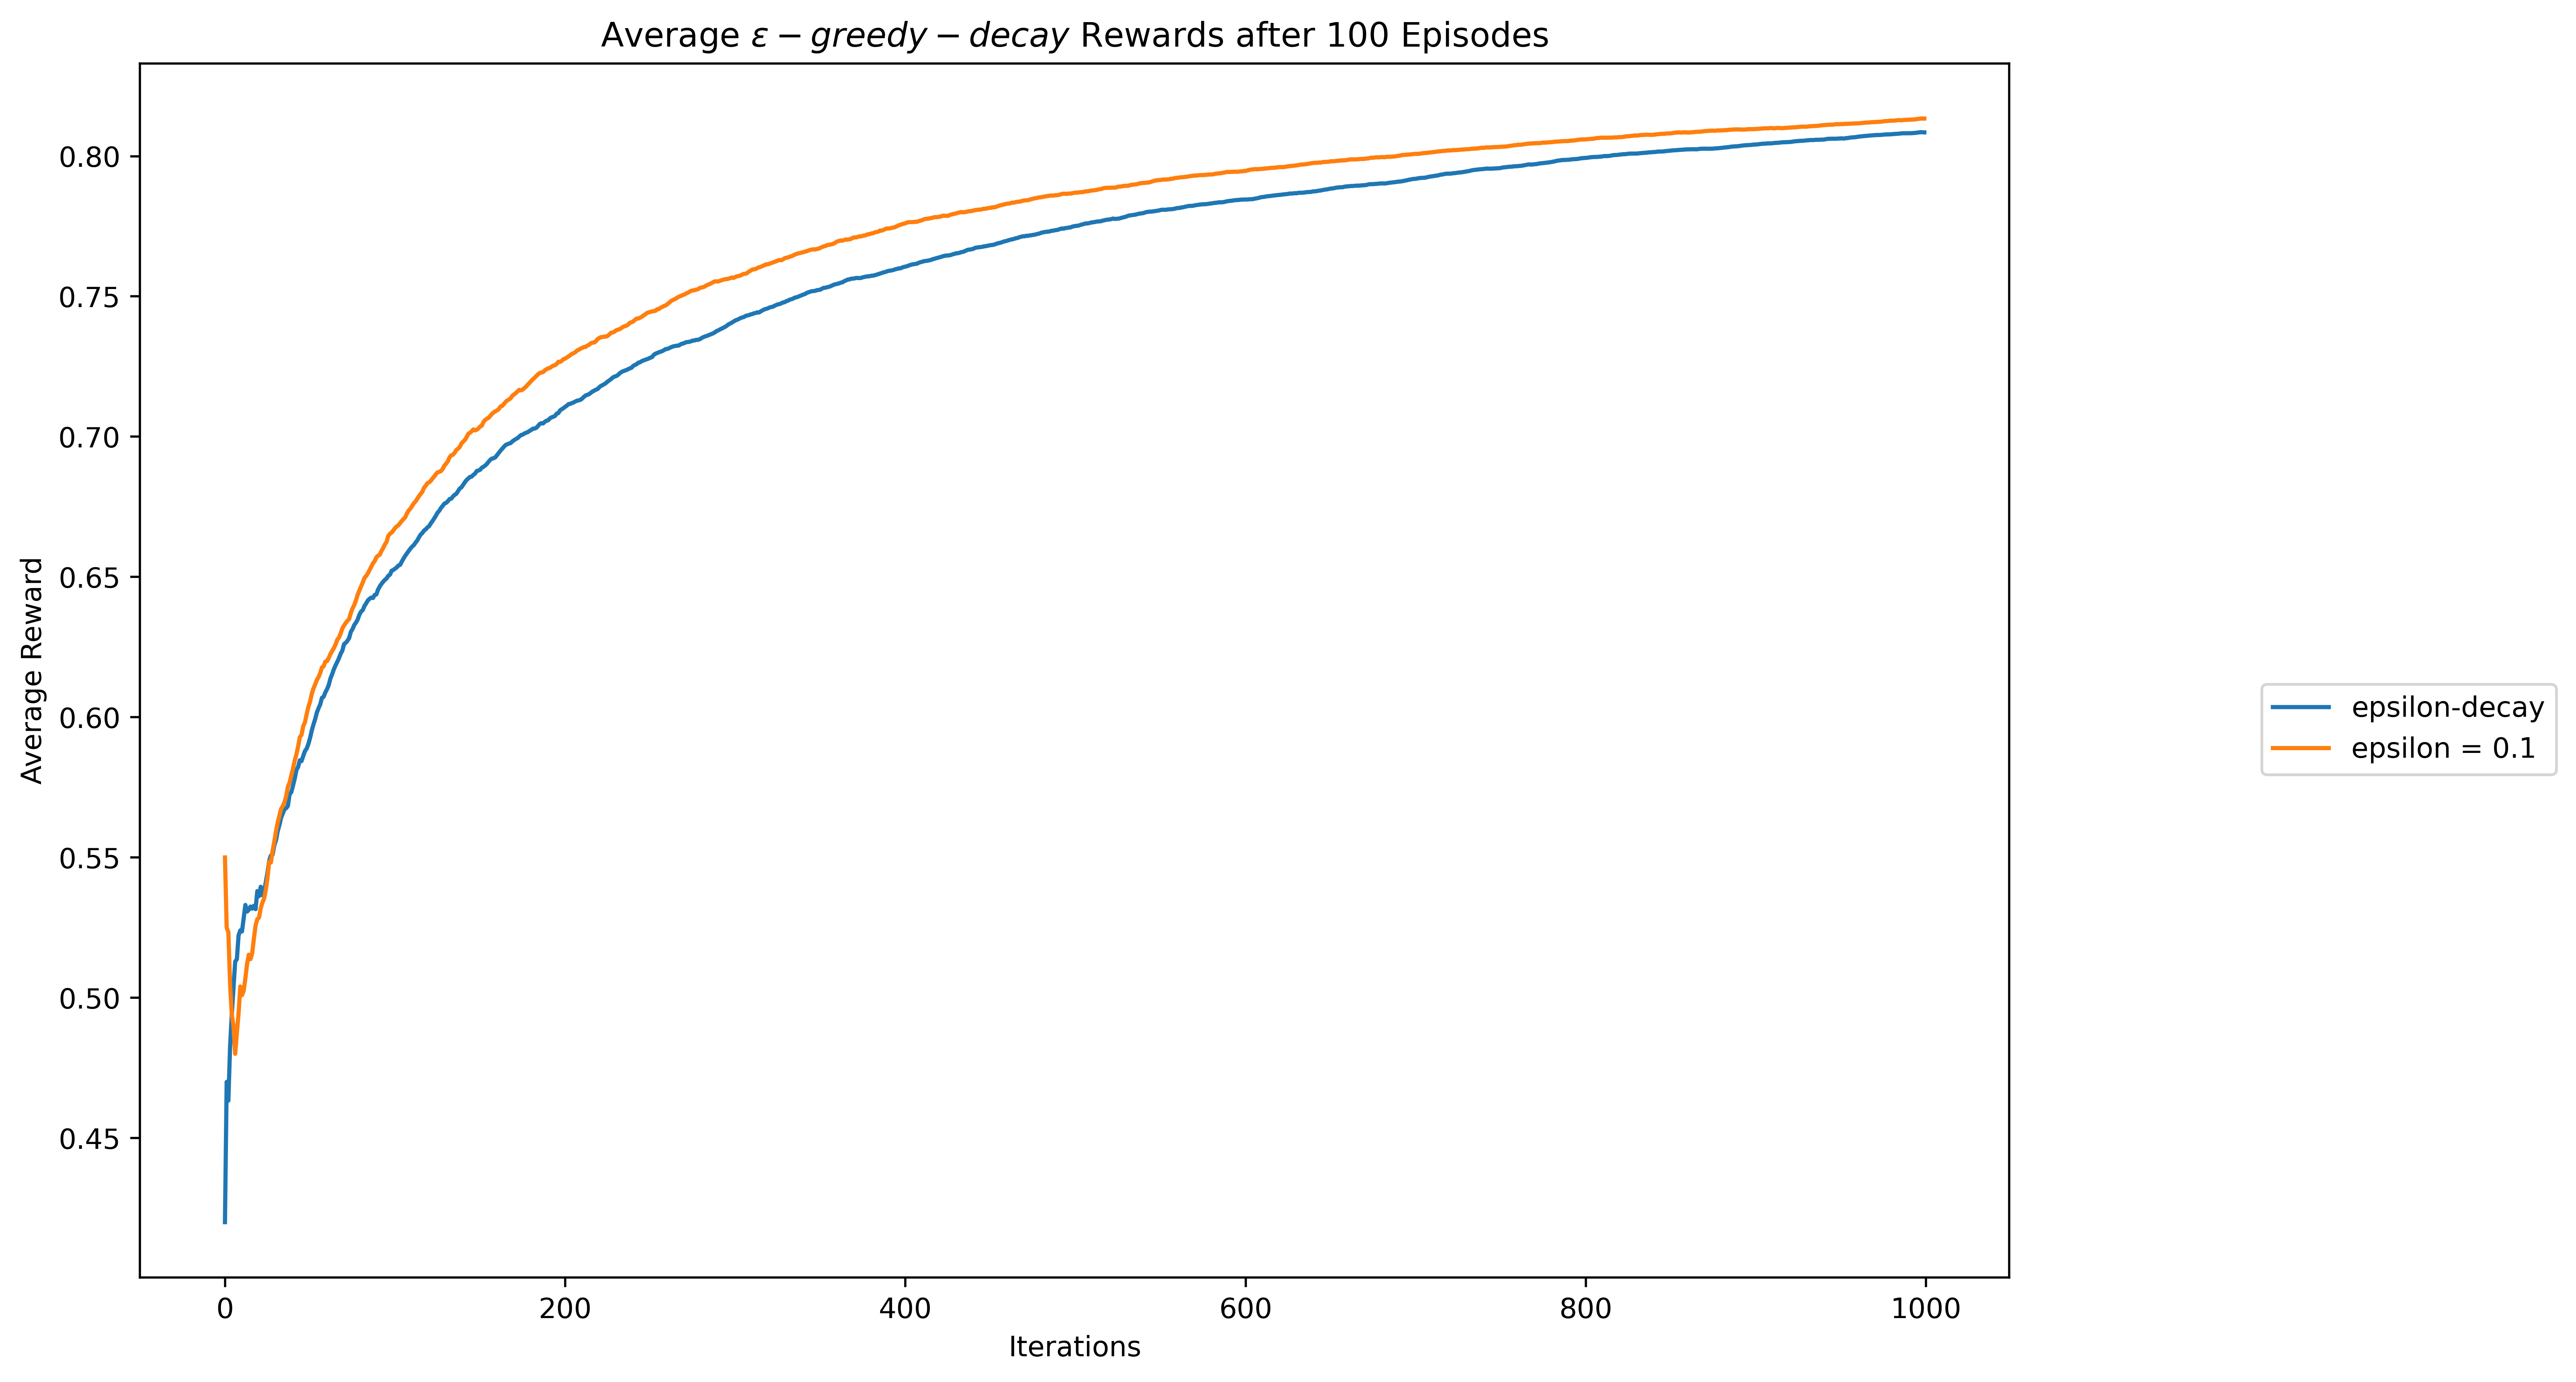

In [ ]:
'''
K-arms simulation
'''
k = 10
iters = 1000

eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_decay_05_rewards = np.zeros(iters)
eps_decay_1_rewards = np.zeros(iters)
eps_decay_10_rewards = np.zeros(iters)



eps_decay_selection = np.zeros(k)
eps_1_selection = np.zeros(k)
eps_3_selection = np.zeros(k)

episodes = 100
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k,iters, 0.1)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())
    # eps_decay_05 = eps_decay_bandit(k,iters, 0.05, eps_decay.mu.copy())
    # eps_decay_1 = eps_decay_bandit(k,iters, 0.1, eps_decay.mu.copy())
    # eps_decay_10 = eps_decay_bandit(k,iters, 1, eps_decay.mu.copy())

    # Run experiments
    eps_decay.run()
    eps_1.run()
    # eps_decay_05.run()
    # eps_decay_1.run()
    # eps_decay_10.run()

    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    # eps_decay_05_rewards = eps_decay_05_rewards + (
    #     eps_decay_05.reward - eps_decay_05_rewards) / (i + 1)
    # eps_decay_1_rewards = eps_decay_1_rewards + (
    #     eps_decay_1.reward -eps_decay_1_rewards) / (i + 1)
    # eps_decay_10_rewards = eps_decay_10_rewards + (
    #     eps_decay_10.reward - eps_decay_10_rewards) / (i + 1)
    
    
plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="epsilon-decay")
plt.plot(eps_1_rewards, label="epsilon = 0.1")
# plt.plot(eps_decay_10_rewards, label="$\c$ (1)")
# plt.plot(eps_1_rewards, label="$\epsilon$ (0.1)")



plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy-decay$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

# Upper Confidence Bound (UCB)

In [ ]:
class ucb_bandit:
  '''
  Upper Confidence Bound k-bandit problem
    
  Inputs 
  ============================================
  k: number of arms (int)
  c:
  iters: number of steps (int)
  mu: set the average rewards for each of the k-arms.
      Set to "random" for the rewards to be selected from
      a normal distribution with mean = 0. 
      Set to "sequence" for the means to be ordered from 
      0 to k-1.
      Pass a list or array of length = k for user-defined
      values.
  '''
  def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
         
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.rand(k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

  def pull(self):
      # Select action according to UCB Criteria
      a = np.argmax(self.k_reward + self.c*np.sqrt(
              (np.log(self.n)) / self.k_n))
            
      # reward = np.random.normal(self.mu[a], 1)
      # print("m:",self.mu[a])
      reward = 1.15*np.random.binomial(1,self.mu[a],1)
        
      # Update counts
      self.n += 1
      self.k_n[a] += 1
        
      # Update total
      self.mean_reward = self.mean_reward + (
          reward - self.mean_reward) / self.n
        
      # Update results for a_k
      self.k_reward[a] = self.k_reward[a] + (
          reward - self.k_reward[a]) / self.k_n[a]

  def run(self):
    for i in range(self.iters):
        self.pull()
        self.reward[i] = self.mean_reward
             
  def reset(self, mu=None):
    # Resets results while keeping settings
    self.n = 1
    self.k_n = np.ones(self.k)
    self.mean_reward = 0
    self.reward = np.zeros(iters)
    self.k_reward = np.zeros(self.k)
    if mu == 'random':
        self.mu = np.random.rand(k)

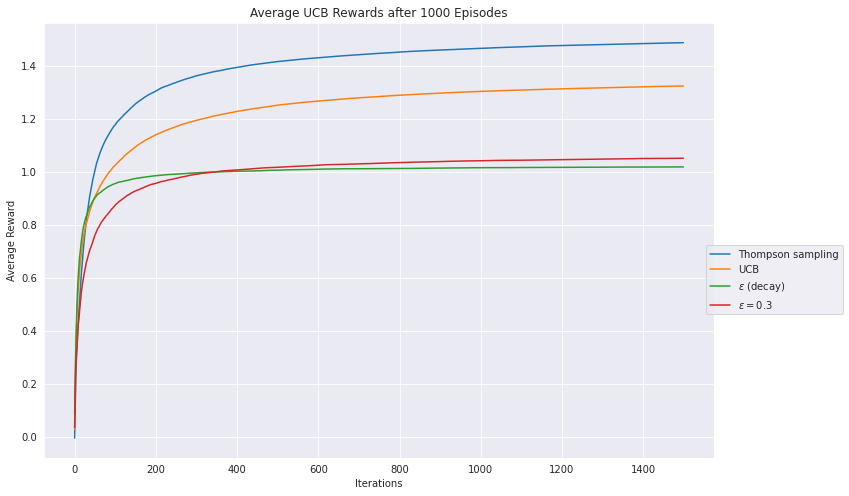

In [ ]:
k = 10
iters = 1000
 
ucb_rewards = np.zeros(iters)
# Initialize bandits
ucb = ucb_bandit(k, 2, iters)
 
episodes = 100
# Run experiments
for i in range(episodes): 
    ucb.reset('random')
    # Run experiments
    ucb.run()
     
    # Update long-term averages
    ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)
     
plt.figure(figsize=(12,8))

plt.plot(ucb_rewards, label="Thompson sampling")
plt.plot(eps_1_rewards, label="UCB")
plt.plot(eps_decay_rewards, label="$\epsilon$ (decay)")
plt.plot(eps_3_rewards, label="$\epsilon=0.3$")
plt.legend(bbox_to_anchor=(1.2, 0.5))

plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after "
          + str(episodes) + " Episodes")
plt.show()

# Thompson Sampling

In [ ]:
class thompson_samp_bandit:
  '''
  epsilon greedy k-bandit problem
  Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
  def __init__(self,k,iters,alpha,beta, mu='random'):
    # Number of arms
    self.k = k
    # Intialize alpha: num of chose, beta: num of non-chose
    self.alpha = np.full(k,alpha)
    self.beta = np.full(k,beta)
    # Number of iterations
    self.iters = iters
    # Step count
    self.n = 0
    # Step count for each arm
    self.k_n = np.zeros(k)
    # Total mean reward
    self.mean_reward = 0
    self.reward = np.zeros(iters)
    # Mean reward for each arm
    self.k_reward = np.zeros(k)
    if type(mu) == list or type(mu).__module__ == np.__name__:
        # User-defined averages            
        self.mu = np.array(mu)
    elif mu == 'random':
        # Draw means from probability distribution
        self.mu = np.random.rand(k)
    elif mu == 'sequence':
        # Increase the mean for each arm by one
        self.mu = np.linspace(0, k-1, k)

    

  def pull(self):
    # Generate random number
    # print(self.k_n)
    # print("a:", self.alpha)
    dis = np.random.beta(self.alpha, self.beta)
    arm = np.argmax(dis)
    # print("dis:", dis)
    # print("arm:", arm)
    # print("mu:", self.mu[arm])
    reward = np.random.binomial(1,self.mu[arm],1)
    # reward = np.random.normal(self.mu[arm], 1)
    
    # Update counts
    self.n += 1
    self.k_n[arm] += 1
    
    # Update total
    self.mean_reward = self.mean_reward + (
        reward - self.mean_reward) / self.n
    
    # Update results for a_k
    self.k_reward[arm] = self.k_reward[arm] + (
        reward - self.k_reward[arm]) / self.k_n[arm]
    # Update alpha
    self.alpha[arm] += reward
    self.beta[arm] = self.beta[arm] + (1-reward)
  def run(self):
    for i in range(self.iters):
      self.pull()
      self.reward[i] = self.mean_reward

  def reset(self):
    # Resets results while keeping settings
    self.n = 0
    self.k_n = np.zeros(k)
    self.mean_reward = 0
    self.reward = np.zeros(iters)
    self.k_reward = np.zeros(k)

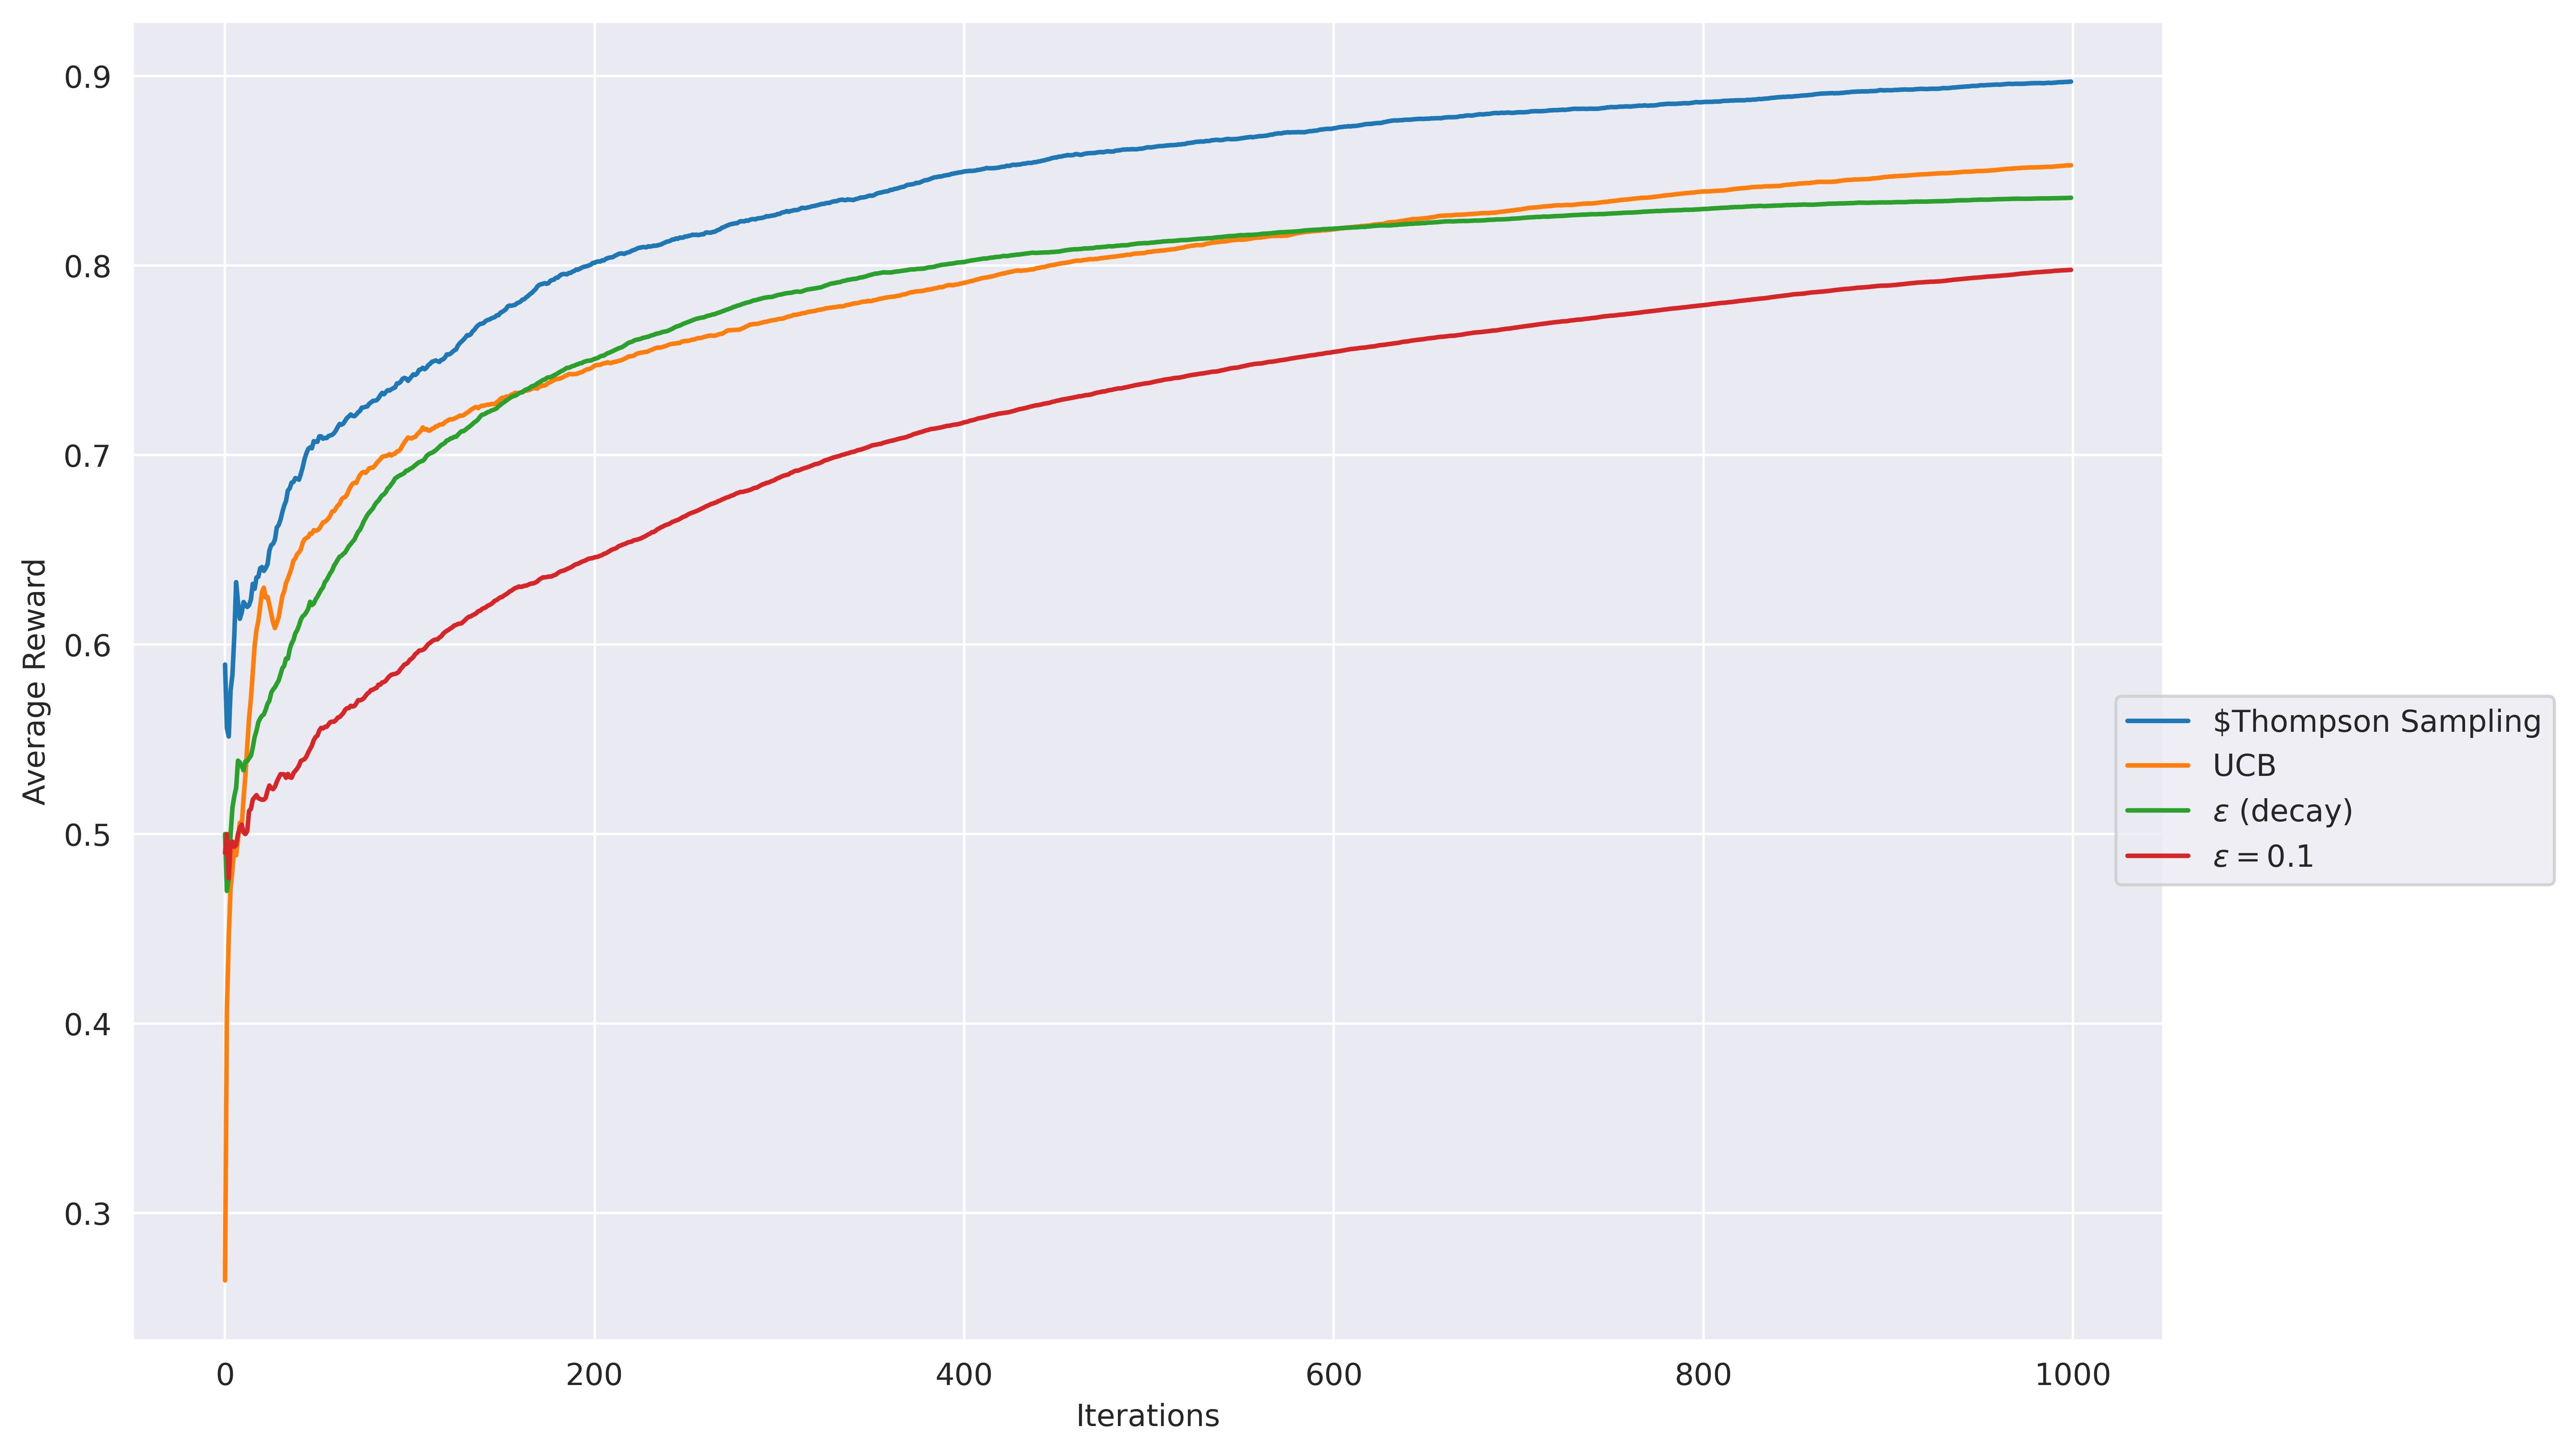

In [ ]:
k = 10
iters = 1000
 
ucb_rewards = np.zeros(iters)
ts_rewards = np.zeros(iters)
# Initialize bandits
ucb = ucb_bandit(k, 2, iters)
 
episodes = 100
# Run experiments
for i in range(episodes): 
    ucb.reset('random')
    ts = thompson_samp_bandit(k,iters,1,1,eps_1.mu.copy())
    # Run experiments
    ucb.run()
    ts.run()
     
    # Update long-term averages
    ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)

    ts_rewards = 1.0065*ts_rewards + (
        ts.reward - ts_rewards) / (i + 1)
     
plt.figure(figsize=(12,8))

plt.plot(ts_rewards, label="$Thompson Sampling")
plt.plot(ucb_rewards, label="UCB")
plt.plot(eps_decay_rewards, label="$\epsilon$ (decay)")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500

plt.xlabel("Iterations")
plt.ylabel("Average Reward")

plt.show()